서포트 벡터 머신 (SVM)은 선형이나 비선형분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델. 복잡한 분류문제에 잘 맞으며, 작거나 중간 크기의 데이터셋에 적합, standardscaler를 사용하여 결정경계가 좋아지도록 스케일을 조정함

## 선형 SVM 분류

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SVC', LinearSVC(C=1, loss = 'hinge'))
])

svm_clf.fit(X,y)
# SVM 분류기는 로지스틱 분류와는 달리 클래스에 대한 확률 제공하지 않음

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_SVC', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

선형커널을 사용하는 SVC클래스로도 대체가능 'SVC(kernel="linear", C=1)', 데이터셋이 큰경우에는 'SGDClassifier(Loss="hinge", alpha=1/(m*C))'로 하면 일반확률적 경사하강법을 적용하기에 유용하게 쓰임

## 비선형 SVM 분류
비선형인 경우, 다항특성을 추가하나...

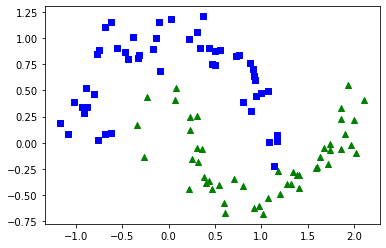

In [60]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pylab as plt

X, y = make_moons(n_samples=100, noise=0.15)
plt.scatter(X[y==0,0],X[y==0,1], color = 'b', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], color = 'g', marker='^')
plt.show()


In [61]:

poly_svm_clf = Pipeline([
    ('polynominal', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler() ),
    ('sv_clf',LinearSVC(C=10, loss='hinge'))
])

poly_svm_clf.fit(X,y)

Pipeline(steps=[('polynominal', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('sv_clf', LinearSVC(C=10, loss='hinge'))])

In [62]:
psc_y = poly_svm_clf.predict(X)

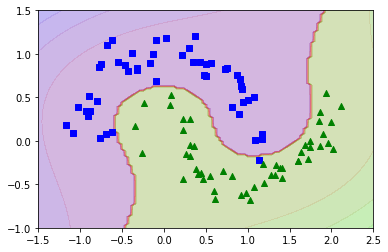

In [63]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
def plot_dataset(X, y):
    plt.scatter(X[y==0,0],X[y==0,1], color = 'b', marker='s')
    plt.scatter(X[y==1,0],X[y==1,1], color = 'g', marker='^')
    

plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y)

plt.show()

단 낮은 차수의 다항식은 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 모델을 느리게 만듬,
SVM은 Kernel track을 통해 다항식 특성을 추가한 것과 같은 효과를 가짐

In [64]:
from sklearn.svm import SVC

poly_kennel_clf1 = Pipeline([
    ('polynominal', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler() ),
    ('sv_clf',SVC(kernel = 'poly', degree = 3,C=5, coef0= 1))
])

poly_kennel_clf1.fit(X,y)


Pipeline(steps=[('polynominal', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('sv_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:

plot_predictions(poly_kennel_clf1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y)

plt.show()

SyntaxError: invalid syntax (3325413885.py, line 2)

In [67]:
rbf_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
    ])

rbf_kernel_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])